# Neural Networks image recognition - MultiLayer Perceptron
Use both MLNN for the following problem.

1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data. **
2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 
3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.

# Neural Networks - Image Recognition 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

## Multi Layer Neural Network
Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).

In [2]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

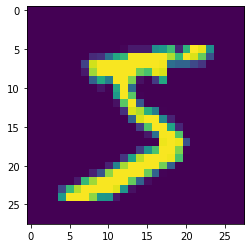

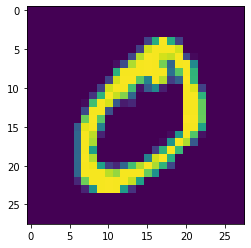

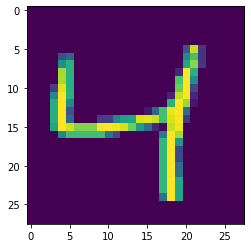

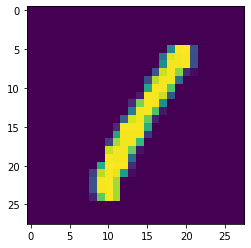

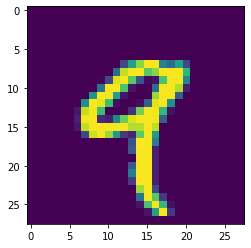

<Figure size 432x288 with 0 Axes>

In [3]:
images = [-1, 0, 1, 2, 3, 4]
for i in images:
    plt.imshow(x_train[i])
    plt.figure(i + 1)

In [4]:
print(y_train[0])
print(y_train[1])
print(y_train[2])
print(y_train[3])
print(y_train[4])

5
0
4
1
9


1) Add random noise (see below on size parameter on np.random.normal) to the images in training and testing. *Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the size parameter should match the data. *



In [5]:
x_train_noise = x_train + np.random.normal(scale = 50, size = x_train.shape)
# Setting scale to 50 appears to "mildly to heavily" distort the image

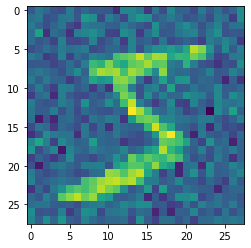

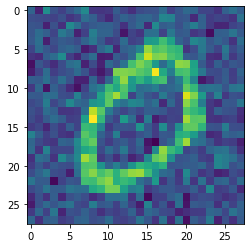

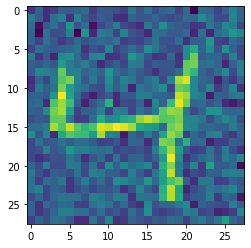

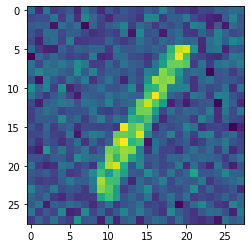

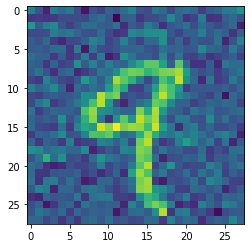

<Figure size 432x288 with 0 Axes>

In [6]:
images = [-1, 0, 1, 2, 3, 4]
for i in images:
    plt.imshow(x_train_noise[i])
    plt.figure(i + 1)

In [7]:
print(y_train[0])
print(y_train[1])
print(y_train[2])
print(y_train[3])
print(y_train[4])

5
0
4
1
9


2) Compare the `accuracy` of train and val after N epochs for MLNN with and without noise.

In [8]:
# Add noise, confirm the distortions are "mild to heavy" and without noise = 0.0
x_train_noise = x_train + np.random.normal(scale = 0.7, size = x_train.shape)
print("Image 1 with noise:", x_train_noise[0, :5])
print("Image 1 without noise:", x_train[0, :5])
print("Image 2 with noise:", x_train_noise[1, :5])
print("Image 2 without noise:",x_train[1, :5])
print("Image 3 with noise:", x_train_noise[2, :5])
print("Image 3 without noise:", x_train[2, :5])
print("Image 4 with noise:", x_train_noise[3, :5])
print("Image 4 without noise:", x_train[3, :5])
print("Image 5 with noise:", x_train_noise[4, :5])
print("Image 5 without noise:", x_train[5, :5])

Image 1 with noise: [[ 0.38248305 -0.26618816  0.04660875  0.02019968  0.00283725  1.08243348
  -0.19294936  0.24220481 -1.15797956 -0.7961585   0.92057683  0.62217734
  -1.17690773 -0.58672908 -0.62252674 -0.87304044 -0.75054664 -0.14183476
  -0.72143164 -0.04985499  1.5549931  -0.25140015 -0.13262035  0.63733253
   0.7648549   0.51082122 -0.39684768  0.2147539 ]
 [ 1.47230661 -0.21868641 -0.23775632  0.55347024  0.64144495 -0.72344572
   0.28860551  0.08588662  0.72119549  0.88335475 -0.6748685   1.37625366
  -1.01445929 -0.18940671 -0.44642431  0.21844896 -0.14258855 -0.0416632
  -0.25216904  0.52498239 -0.301516   -1.36956365  0.3974975  -0.33753768
  -0.06454998 -0.48257323 -0.43382264 -0.24656412]
 [ 0.10666124  0.03272304 -0.14629471  0.1945251  -0.31673246 -0.34488001
   0.18715389  0.43726696 -0.25859383  1.14035186  0.73620484  0.10559565
   0.97090719  0.24998227 -0.4451798   1.39637862  0.33714875 -0.25786243
  -0.01418439  0.47853183 -0.18459838 -0.68473961  1.14954562 -0.

In [9]:
# Reshape
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


3) Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.

In [10]:
scales = [.1, .5, 1.0, 2.0, 4.0]
train_acc = []
test_acc = []

batch_size = 128
num_classes = 10
epochs = 20

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

for scale in scales:
    x_train_noise = x_train + np.random.normal(scale = scale, size = x_train.shape)
    x_test_noise = x_test + np.random.normal(scale = scale, size = x_test.shape)

    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(),
                  metrics=['accuracy'])

    history = model.fit(x_train_noise, y_train,
                        batch_size = batch_size,
                        epochs = epochs,
                        verbose = 1,
                        validation_data = (x_test_noise, y_test))
    score = model.evaluate(x_test_noise, y_test, verbose=0)
    
    train_acc.append(history.history['accuracy'][-1])
    test_acc.append(score[1])

Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20


2022-04-09 16:28:34.877125: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-09 16:28:34.877223: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-04-09 16:28:35.024176: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


  1/469 [..............................] - ETA: 3:09 - loss: 2.3798 - accuracy: 0.1484

2022-04-09 16:28:35.285051: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


468/469 [============================>.] - ETA: 0s - loss: 0.2639 - accuracy: 0.9186

2022-04-09 16:28:39.767945: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 5s 10ms/step - loss: 0.2636 - accuracy: 0.9187 - val_loss: 0.1242 - val_accuracy: 0.9606
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1001 - accuracy: 0.9693 - val_loss: 0.0995 - val_accuracy: 0.9698
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0601 - accuracy: 0.9815 - val_loss: 0.1012 - val_accuracy: 0.9731
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0432 - accuracy: 0.9866 - val_loss: 0.1146 - val_accuracy: 0.9703
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0298 - accuracy: 0.9903 - val_loss: 0.1287 - val_accuracy: 0.9719
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0244 - accuracy: 0.9920 - val_loss: 0.1278 - val_accuracy: 0.9747
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0181 - accuracy: 0.9942 - val_loss: 0.1767 - val_accuracy: 0.9694
Epoch 8/20

2022-04-09 16:30:10.932032: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.5429 - accuracy: 0.8233

2022-04-09 16:30:15.327191: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 5s 10ms/step - loss: 0.5429 - accuracy: 0.8233 - val_loss: 0.3267 - val_accuracy: 0.8969
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2389 - accuracy: 0.9233 - val_loss: 0.2679 - val_accuracy: 0.9144
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1222 - accuracy: 0.9603 - val_loss: 0.2996 - val_accuracy: 0.9160
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0693 - accuracy: 0.9769 - val_loss: 0.3562 - val_accuracy: 0.9169
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0488 - accuracy: 0.9837 - val_loss: 0.3948 - val_accuracy: 0.9169
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0364 - accuracy: 0.9875 - val_loss: 0.4615 - val_accuracy: 0.9147
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0333 - accuracy: 0.9895 - val_loss: 0.4894 - val_accuracy: 0.9181
Epoch 8/20

2022-04-09 16:31:47.003491: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


468/469 [============================>.] - ETA: 0s - loss: 1.0758 - accuracy: 0.6348

2022-04-09 16:31:51.370412: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 5s 10ms/step - loss: 1.0750 - accuracy: 0.6351 - val_loss: 0.7961 - val_accuracy: 0.7342
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.6531 - accuracy: 0.7798 - val_loss: 0.7241 - val_accuracy: 0.7615
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.4403 - accuracy: 0.8521 - val_loss: 0.7801 - val_accuracy: 0.7562
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2899 - accuracy: 0.9007 - val_loss: 0.8869 - val_accuracy: 0.7614
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1984 - accuracy: 0.9319 - val_loss: 1.0222 - val_accuracy: 0.7520
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1540 - accuracy: 0.9477 - val_loss: 1.1511 - val_accuracy: 0.7570
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1365 - accuracy: 0.9534 - val_loss: 1.2285 - val_accuracy: 0.7539
Epoch 8/20

2022-04-09 16:33:23.581108: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


468/469 [============================>.] - ETA: 0s - loss: 1.8635 - accuracy: 0.3590

2022-04-09 16:33:27.992604: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 5s 10ms/step - loss: 1.8632 - accuracy: 0.3591 - val_loss: 1.5765 - val_accuracy: 0.4569
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 1.4564 - accuracy: 0.4988 - val_loss: 1.5714 - val_accuracy: 0.4550
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 1.2543 - accuracy: 0.5680 - val_loss: 1.6014 - val_accuracy: 0.4527
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 1.0614 - accuracy: 0.6331 - val_loss: 1.6739 - val_accuracy: 0.4450
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.8799 - accuracy: 0.6963 - val_loss: 1.8049 - val_accuracy: 0.4389
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.7494 - accuracy: 0.7405 - val_loss: 1.9696 - val_accuracy: 0.4289
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.6427 - accuracy: 0.7746 - val_loss: 2.1054 - val_accuracy: 0.4189
Epoch 8/20

2022-04-09 16:35:01.787564: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


467/469 [============================>.] - ETA: 0s - loss: 2.3981 - accuracy: 0.1583

2022-04-09 16:35:06.261999: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 5s 10ms/step - loss: 2.3974 - accuracy: 0.1585 - val_loss: 2.1581 - val_accuracy: 0.2123
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 2.0790 - accuracy: 0.2546 - val_loss: 2.1296 - val_accuracy: 0.2276
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 1.9425 - accuracy: 0.3121 - val_loss: 2.1475 - val_accuracy: 0.2301
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 1.8133 - accuracy: 0.3582 - val_loss: 2.1881 - val_accuracy: 0.2221
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 1.6906 - accuracy: 0.4047 - val_loss: 2.2456 - val_accuracy: 0.2199
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 1.5795 - accuracy: 0.4459 - val_loss: 2.3179 - val_accuracy: 0.2120
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 1.4755 - accuracy: 0.4817 - val_loss: 2.3824 - val_accuracy: 0.2097
Epoch 8/20

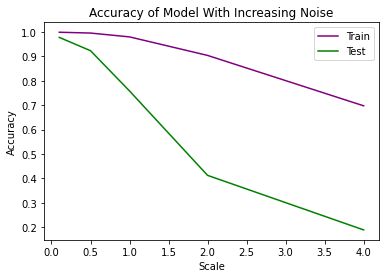

In [11]:
plt.figure()
plt.plot(scales, train_acc, label = 'Train', c = "purple")
plt.plot(scales, test_acc, label = 'Test', c = "green")
plt.xlabel('Scale')
plt.ylabel('Accuracy')
plt.title('Accuracy of Model With Increasing Noise')
plt.legend()
plt.show()

As evidenced above the accuracy of the model decreases steadily as the noise increases, which makes sense. 